<a href="https://colab.research.google.com/github/Kami0rn/Pytorch/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the option).

## 1. Make classification data and get it ready

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples= 1000

# Create cicles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X : {X[:5]}")
print(f"First 5 samples of y : {y[:5]}")

First 5 samples of X : [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y : [1 1 1 1 0]


In [5]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [6]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0]
                        ,"X2": X[:,1],
                       "label": y})


circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


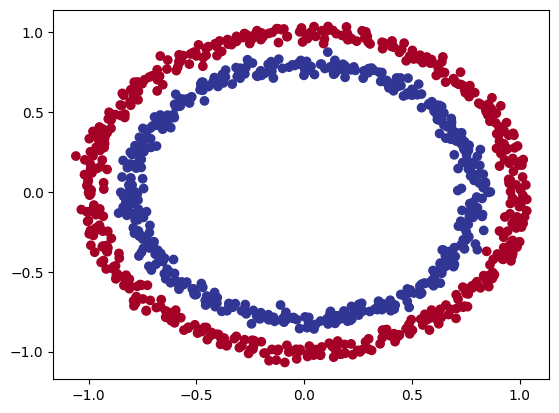

In [7]:
# Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Note :** the data we're working is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the funcdamentals.

### 1.1 Check input and output shapes

In [8]:
X.shape , y.shape

((1000, 2), (1000,))

In [9]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Vlaue for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for on sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Vlaue for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for on sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [10]:
import torch
torch.__version__

'2.6.0+cu124'

In [11]:
type(X)

numpy.ndarray

In [12]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5] , y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [13]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [14]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(X,
                                                      y,
                                                      test_size=0.2 ,
                                                      random_state=42)

In [15]:
len(X_train) , len(y_train) , len(X_test) , len(y_test)

(800, 800, 200, 200)

In [16]:
n_samples

1000

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one.
2. Construct a model (by subclassing `nn.Module`).
3. Define a loss function and optimizer.
4. Create a trainig and test loop.

In [17]:
# Import PyTorch and nn
import torch
from   torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we've setup device agnostic code, let's create a model that ⁉

1. Subclasses `nn.Module` (almost)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (of forward computation) of the model
4. Instantiate an instance of our model class and send it to the target `device`

In [18]:
X_train.shape

torch.Size([800, 2])

In [19]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self) :
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2 , out_features=5)
    self.layer_2 = nn.Linear(in_features=5 , out_features=1)

    self.two_layers = nn.Sequential(
        nn.Linear(in_features=2,out_features=5),
        nn.Linear(in_features=5,out_features=1)
    )

  # 3. define a forward() method that outlines the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

  # 4. Instantiate an istance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (two_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [20]:
device

'cuda'

In [21]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [22]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1468, -0.5136],
                      [ 0.1166,  0.4943],
                      [ 0.5559,  0.4998],
                      [ 0.4593, -0.4329],
                      [-0.0329, -0.5801]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0383,  0.1467,  0.5529, -0.0543,  0.2681], device='cuda:0')),
             ('1.weight',
              tensor([[0.3713, 0.2449, 0.4170, 0.3969, 0.2347]], device='cuda:0')),
             ('1.bias', tensor([0.0043], device='cuda:0'))])

In [24]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test sample: {len(X_test)} , Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test sample: 200 , Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.],
        [0.],
        [0.],
        [-0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [-0.],
        [0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [25]:
X_test[:10] , y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use ?

Again... this is problem specific.

For example for regression you might want MAE or MSE (mean absolute error or mean square error).

For classification you might want binary cross entropy or categorical cross entropy (cross entropy).

As a reminder, the loss function measures ho *wrong* your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

* For the loss function we're going to use `torch.nn.BECWithLogitsLoss()`, for more on what binary cross entropy (BCE) is, check out this article
* For a definrion on what a logit is in deep learning

In [26]:
# Setup the loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation functions prior to input to BCEloss 
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [27]:
# Calculate accuracy - out of 100 examples , what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

## 3. Train model

To train our model, we're going to need to build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probability -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary crossentropy and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [28]:
# View the first 5 output of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0012],
        [ 0.1430],
        [ 0.0072],
        [-0.0052],
        [ 0.6208]], device='cuda:0')

In [29]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4997],
        [0.5357],
        [0.5018],
        [0.4987],
        [0.6504]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [30]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred_prob -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

# Get rid of extra dimention
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 1., 1., 0., 1.], device='cuda:0')

### 3.2 Building a training and testing loop

In [31]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device) , y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()
    
    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # Turn logits -> pred probs -> pred labels
    
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), ## nn.BCELoss expects prediction as input
    #                y_train)
    loss = loss_fn(y_logits, ## nn.BCEWithLogitsLoss expect raw logits as input
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward (backpropagation)
    loss.backward()
    
    # 5. Optimizer step (gradient descent)
    optimizer.step()
    
    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logist = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logist))
        
        # 2. Calculate the test loss/acc
        test_loss = loss_fn(test_logist,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    # Printout what's happen
    if epoch % 10 == 0 :
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71769, Acc: 52.25% | Test loss: 0.71618 | Test acc: 55.00%
Epoch: 10 | Loss: 0.70751, Acc: 51.12% | Test loss: 0.70729 | Test acc: 53.00%
Epoch: 20 | Loss: 0.70282, Acc: 50.62% | Test loss: 0.70331 | Test acc: 53.50%
Epoch: 30 | Loss: 0.70030, Acc: 49.62% | Test loss: 0.70127 | Test acc: 52.50%
Epoch: 40 | Loss: 0.69876, Acc: 50.25% | Test loss: 0.70009 | Test acc: 51.00%
Epoch: 50 | Loss: 0.69771, Acc: 49.88% | Test loss: 0.69931 | Test acc: 51.50%
Epoch: 60 | Loss: 0.69694, Acc: 49.88% | Test loss: 0.69876 | Test acc: 52.50%
Epoch: 70 | Loss: 0.69634, Acc: 49.88% | Test loss: 0.69835 | Test acc: 52.50%
Epoch: 80 | Loss: 0.69586, Acc: 49.88% | Test loss: 0.69801 | Test acc: 51.50%
Epoch: 90 | Loss: 0.69547, Acc: 49.50% | Test loss: 0.69774 | Test acc: 50.50%


In [32]:
loss_fn

BCEWithLogitsLoss()

In [33]:
loss_fn_without_logits = nn.BCELoss()
loss_fn_without_logits

BCELoss()

## 4. Make predictions and evaluate the model

From the metrics it look like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual.

To do so, we're going to import a function called `plot_decision_boundary()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [34]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)



helper_functions.py already exists, skipping download


In [35]:
# import sys
# !{sys.executable} -m pip install torchvision

In [36]:
import sys
!{sys.executable} -m pip show torchvision

Name: torchvision
Version: 0.21.0+cu124
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: c:\Python312\Lib\site-packages
Requires: numpy, pillow, torch
Required-by: 


DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [37]:
import sys
print(sys.executable)

c:\Python312\python.exe


In [38]:
from helper_functions import plot_predictions, plot_decision_boundary

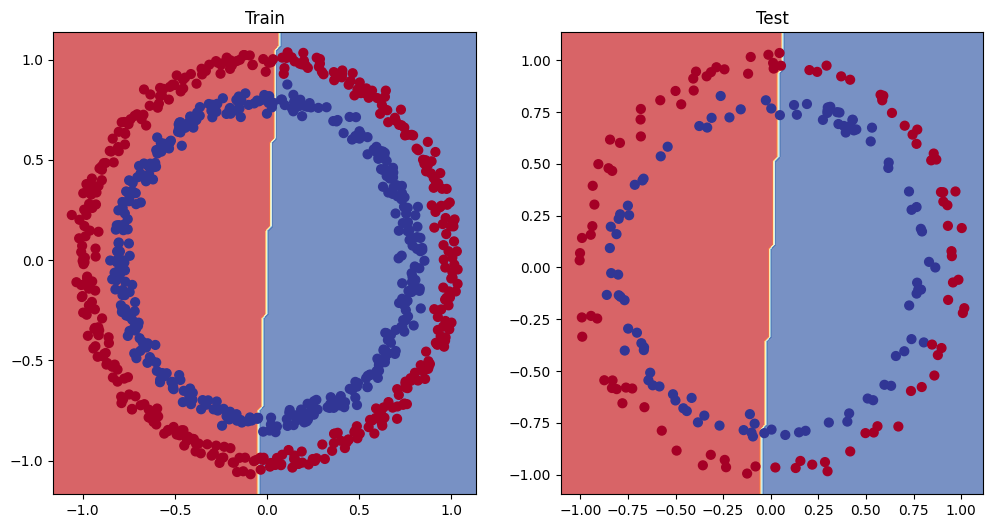

In [39]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)